In [23]:
import pandas as pd
import numpy as np
import random


# Set the seed for reproducibility
seed_value = 43
random.seed(seed_value)
np.random.seed(seed_value)


# Number of records to generate
num_records = 2000

# Define possible values for categorical fields
age_groups = ['Young', 'Middle-aged', 'Senior']
attrition_status = ['Yes', 'No']
business_travel_options = ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
#departments = ['Sales', 'Research & Development', 'Human Resources']
education_fields = ['Life Sciences', 'Other', 'Medical', 'Technical Degree']
genders = ['Male', 'Female']
job_roles = ['Clinical Trial Assistant', 'Clinical Research Associate I', 'Clinical Research Associate II', 'Senior CRA','Clinical Trial Manager','Clinical Project Manager']
marital_statuses = ['Single', 'Married', 'Divorced']
salary_slabs = ['Low', 'Medium', 'High']
over_time_options = ['Yes', 'No']


# Generate synthetic data
data = {
    'EmpID': [f"E{1000+i}" for i in range(num_records)],
    'Age': np.random.randint(18, 60, num_records),
    'AgeGroup': [random.choice(age_groups) for _ in range(num_records)],
    'Attrition': [random.choices(attrition_status, weights=[0.7, 0.3], k=num_records)[0] for _ in range(num_records)],
    'BusinessTravel': [random.choice(business_travel_options) for _ in range(num_records)],
    'DailyRate': np.random.randint(100, 1500, num_records),
    #'Department': [random.choice(departments) for _ in range(num_records)],
    'DistanceFromHome': np.random.randint(1, 30, num_records),
    'Education': np.random.randint(1, 5, num_records),
    'EducationField': [random.choice(education_fields) for _ in range(num_records)],
    'EmployeeCount': [1]*num_records,
    'EmployeeNumber': np.random.randint(1000, 9999, num_records),
    'EnvironmentSatisfaction': np.random.randint(1, 5, num_records),
    'Gender': [random.choice(genders) for _ in range(num_records)],
    'HourlyRate': np.random.randint(20, 100, num_records),
    'JobInvolvement': np.random.randint(1, 5, num_records),
    'JobLevel': np.random.randint(1, 6, num_records),
    'JobRole': [random.choice(job_roles) for _ in range(num_records)],
    'JobSatisfaction': np.random.randint(1, 5, num_records),
    'MaritalStatus': [random.choice(marital_statuses) for _ in range(num_records)],
    'MonthlyIncome': np.random.randint(2000, 20000, num_records),
    'SalarySlab': [random.choice(salary_slabs) for _ in range(num_records)],
    'MonthlyRate': np.random.randint(1000, 20000, num_records),
    'NumCompaniesWorked': np.random.randint(0, 10, num_records),
    'Over18': ['Y']*num_records,
    'OverTime': [random.choice(over_time_options) for _ in range(num_records)],
    'PercentSalaryHike': np.random.randint(10, 25, num_records),
    'PerformanceRating': np.random.randint(1, 5, num_records),
    'RelationshipSatisfaction': np.random.randint(1, 5, num_records),
    'StandardHours': [8]*num_records,
    'StockOptionLevel': np.random.randint(0, 4, num_records),
    'TotalWorkingYears': np.random.randint(0, 40, num_records),
    'TrainingTimesLastYear': np.random.randint(0, 10, num_records),
    'WorkLifeBalance': np.random.randint(1, 5, num_records),
    'YearsAtCompany': np.random.randint(0, 30, num_records),
    'YearsInCurrentRole': np.random.randint(0, 15, num_records),
    'YearsSinceLastPromotion': np.random.randint(0, 10, num_records),
    'YearsWithCurrManager': np.random.randint(0, 15, num_records)
}

# Create DataFrame
df = pd.DataFrame(data)

#Save to CSV
df.to_csv("synthetic_employee_database.csv", index=False)


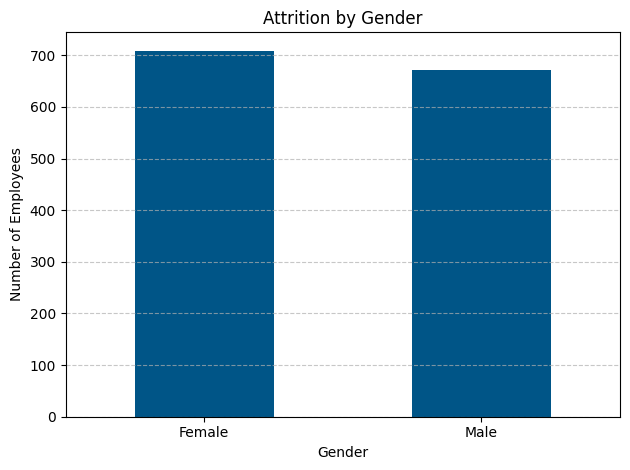

<Figure size 640x480 with 0 Axes>

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("synthetic_employee_database.csv")

# Calculate attrition counts by gender
attrition_counts = df[df['Attrition'] == 'Yes'].groupby('Gender').size()

# Plotting
attrition_counts.plot(kind='bar', color='#005587')
plt.title('Attrition by Gender')
plt.ylabel('Number of Employees')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save and show the plot
plt.savefig("Attrition_by_Gender.png")
plt.show()


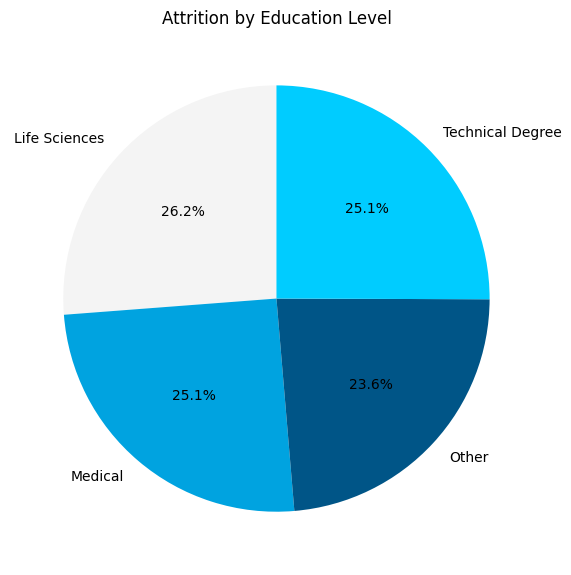

<Figure size 640x480 with 0 Axes>

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("synthetic_employee_database.csv")

# Count attrition by education field
attrition_by_education = df[df['Attrition'] == 'Yes'].groupby('EducationField').size()

# Define custom colors
custom_colors = ['#F4F4F4', '#00A3E0', '#005587', '#00CCFF', '#A0A0A0']  # Added one more for demonstration

# Plotting a pie chart with specified colors
plt.figure(figsize=(6, 6))
attrition_by_education.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_colors[:len(attrition_by_education)]
)
plt.title('Attrition by Education Level')
plt.ylabel('')  # Hide y-label for aesthetics
plt.tight_layout()
plt.show()

# Save and show the plot
plt.savefig("Attrition_by_Education.png")
plt.show()




C:\Users\u1143800\AppData\Local\Temp\ipykernel_14264\2009490563.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_data['AgeGroupSegmented'] = pd.cut(attrition_data['Age'], bins=bins, labels=labels, right=True)


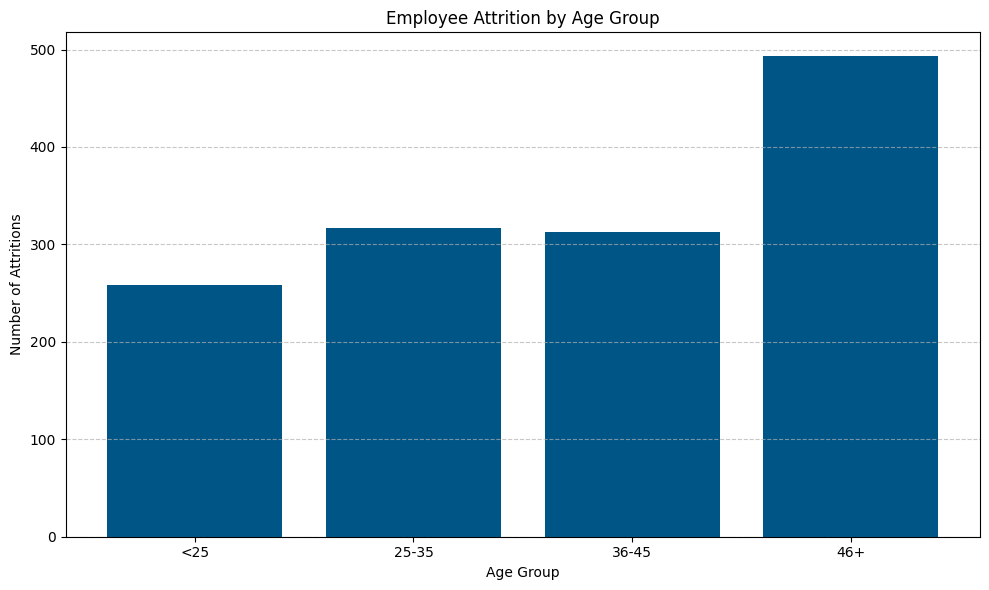

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for employees who left (Attrition = 'Yes')
attrition_data = df[df['Attrition'] == 'Yes']

# Define age bins and labels
bins = [0, 25, 35, 45, 100]
labels = ['<25', '25-35', '36-45', '46+']

# Create a new column for age groups
attrition_data['AgeGroupSegmented'] = pd.cut(attrition_data['Age'], bins=bins, labels=labels, right=True)

# Count attrition by age group
attrition_by_age_group = attrition_data['AgeGroupSegmented'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_age_group.index, attrition_by_age_group.values, color='#005587')
plt.xlabel('Age Group')
plt.ylabel('Number of Attritions')
plt.title('Employee Attrition by Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save and show the plot
plt.savefig("Attrition_by_Age.png")
plt.show()



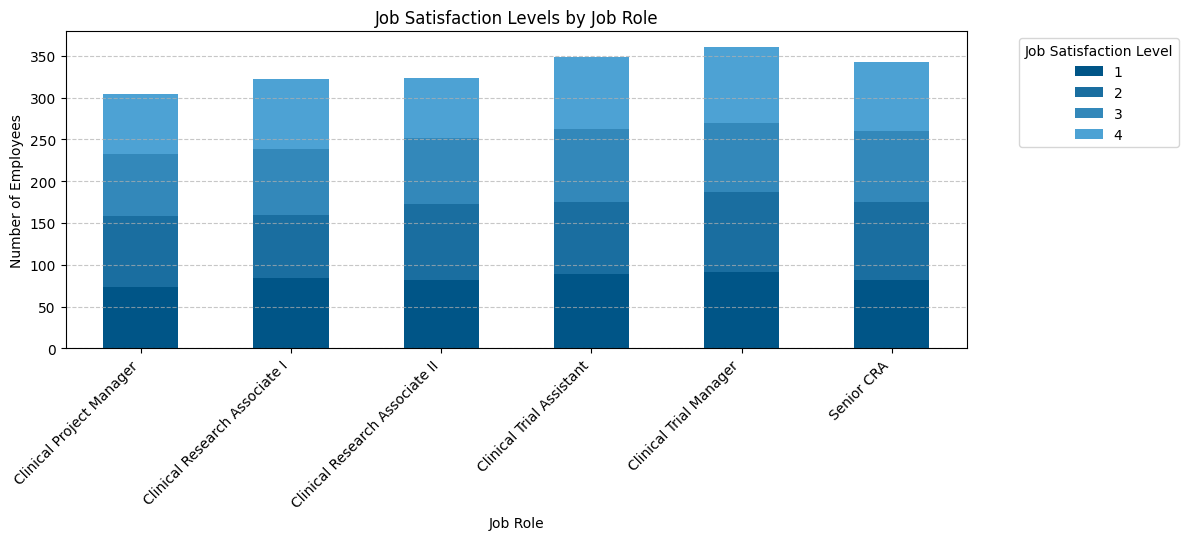

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Create a pivot table to count job satisfaction levels per job role
job_satisfaction_by_role = df.groupby('JobRole')['JobSatisfaction'].value_counts().unstack().fillna(0)

# Ensure satisfaction levels are in order
job_satisfaction_by_role = job_satisfaction_by_role[[1, 2, 3, 4]]

# Generate gradient colors from base color '#005587'
base_color = mcolors.to_rgb('#005587')
gradient_colors = [
    mcolors.to_hex(np.clip((base_color[0] + i * 0.1, base_color[1] + i * 0.1, base_color[2] + i * 0.1), 0, 1))
    for i in range(4)
]

# Plot the stacked bar chart
job_satisfaction_by_role.plot(kind='bar', stacked=True, figsize=(12, 6), color=gradient_colors)
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.title('Job Satisfaction Levels by Job Role')
plt.legend(title='Job Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

# Save and show the plot
plt.savefig("Satifaction_by_Job_role.png")
plt.show()



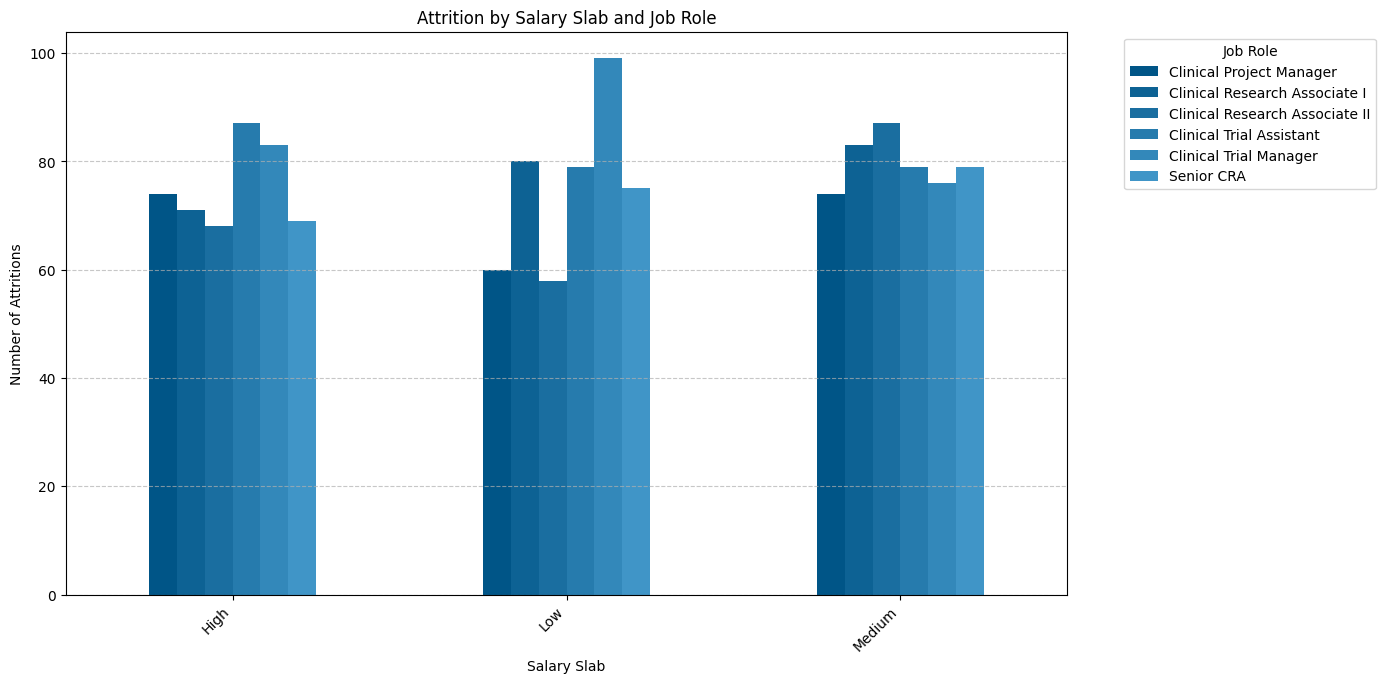

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


# Filter for employees who left
attrition_data = df[df['Attrition'] == 'Yes']

# Create a pivot table: count of attrition by SalarySlab and JobRole
pivot_table = attrition_data.pivot_table(index='SalarySlab', columns='JobRole', aggfunc='size', fill_value=0)

# Sort salary slabs for consistent ordering
pivot_table = pivot_table.reindex(sorted(pivot_table.index), axis=0)

# Generate gradient colors from base color '#005587'
base_color = mcolors.to_rgb('#005587')
num_roles = len(pivot_table.columns)
gradient_colors = [
    mcolors.to_hex(np.clip((base_color[0] + i * 0.05, base_color[1] + i * 0.05, base_color[2] + i * 0.05), 0, 1))
    for i in range(num_roles)
]

# Plot grouped bar chart
pivot_table.plot(kind='bar', figsize=(14, 7), color=gradient_colors)
plt.xlabel('Salary Slab')
plt.ylabel('Number of Attritions')
plt.title('Attrition by Salary Slab and Job Role')
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

# Save and show the plot
plt.savefig("Attrition_by_Salary_Slab_and_Job_Role.png")
plt.show()



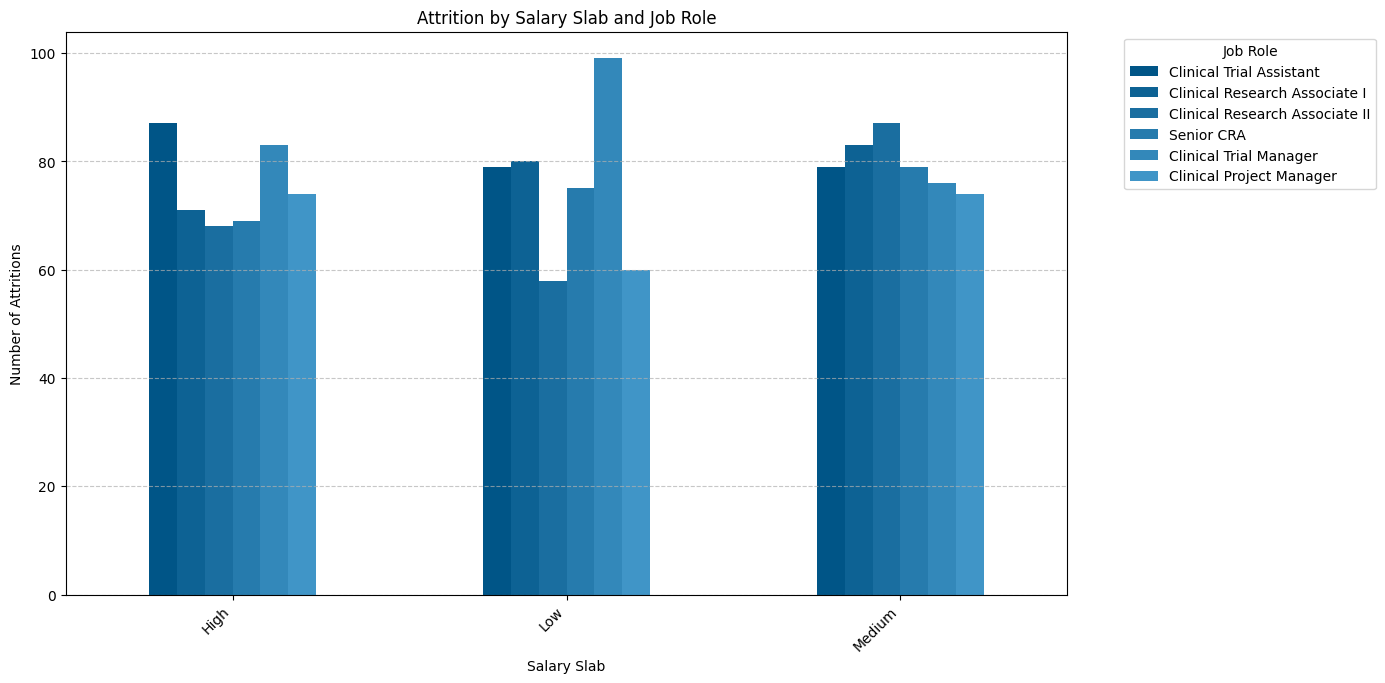

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Load the dataset
df = pd.read_csv("synthetic_employee_database.csv")

# Filter for employees who left
attrition_data = df[df['Attrition'] == 'Yes']

# Define the desired job role order
job_roles = [
    'Clinical Trial Assistant',
    'Clinical Research Associate I',
    'Clinical Research Associate II',
    'Senior CRA',
    'Clinical Trial Manager',
    'Clinical Project Manager'
]

# Filter data to include only the specified job roles
attrition_data = attrition_data[attrition_data['JobRole'].isin(job_roles)]

# Create a pivot table: count of attrition by SalarySlab and JobRole
pivot_table = attrition_data.pivot_table(index='SalarySlab', columns='JobRole', aggfunc='size', fill_value=0)

# Reorder the columns according to the specified job role order
pivot_table = pivot_table[job_roles]

# Sort salary slabs for consistent ordering
pivot_table = pivot_table.reindex(sorted(pivot_table.index), axis=0)

# Generate gradient colors from base color '#005587'
base_color = mcolors.to_rgb('#005587')
num_roles = len(job_roles)
gradient_colors = [
    mcolors.to_hex(np.clip((base_color[0] + i * 0.05, base_color[1] + i * 0.05, base_color[2] + i * 0.05), 0, 1))
    for i in range(num_roles)
]

# Plot grouped bar chart
pivot_table.plot(kind='bar', figsize=(14, 7), color=gradient_colors)
plt.xlabel('Salary Slab')
plt.ylabel('Number of Attritions')
plt.title('Attrition by Salary Slab and Job Role')
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


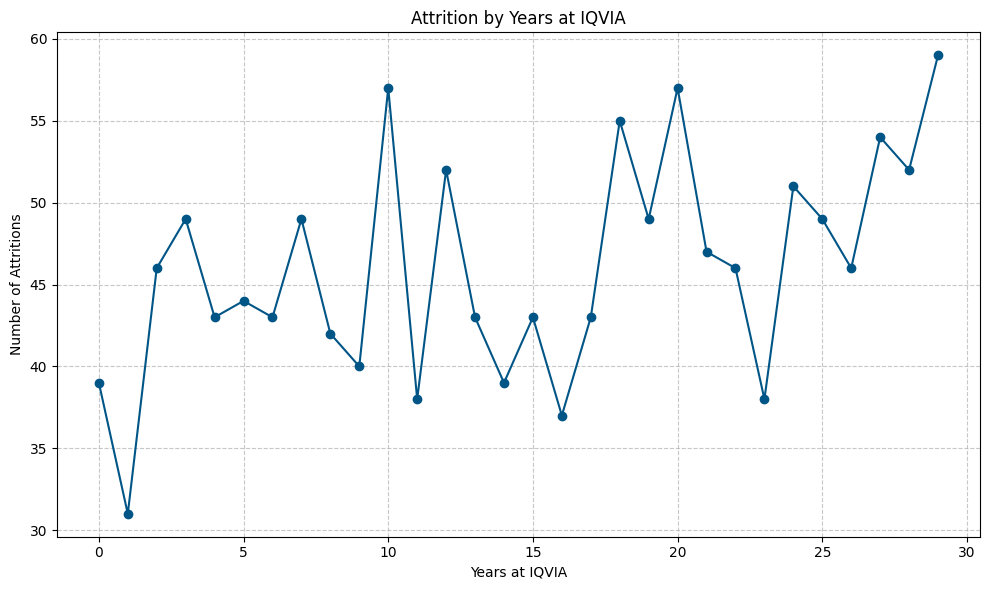

<Figure size 640x480 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("synthetic_employee_database.csv")

# Filter for employees who left
attrition_data = df[df['Attrition'] == 'Yes']

# Count attrition by years at company
attrition_by_years = attrition_data['YearsAtCompany'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(attrition_by_years.index, attrition_by_years.values, marker='o', linestyle='-', color='#005587')
plt.xlabel('Years at IQVIA')
plt.ylabel('Number of Attritions')
plt.title('Attrition by Years at IQVIA')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save and show the plot
plt.savefig("Attrition_by_Years_at_IQVIA.png")
plt.show()




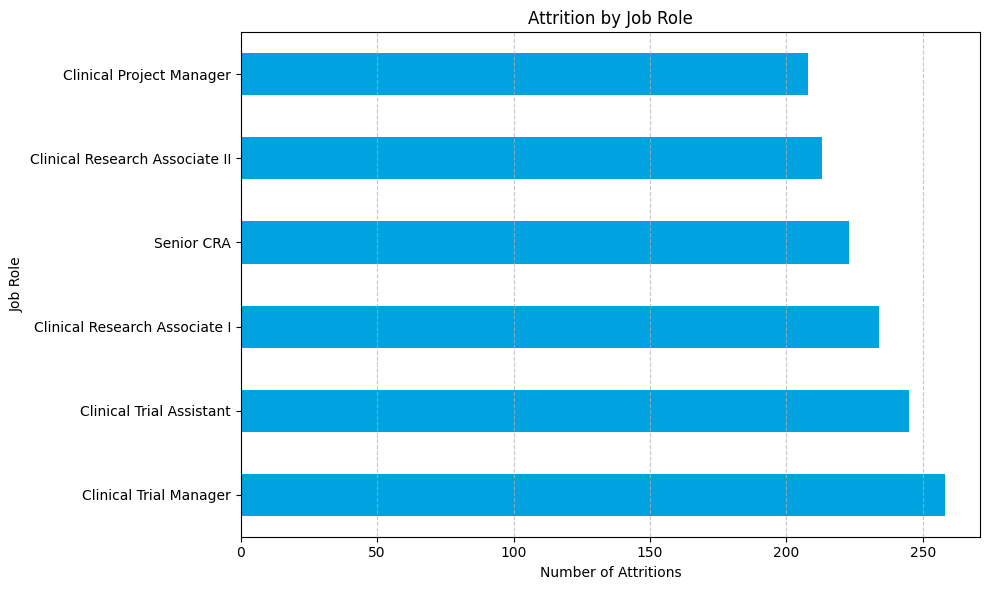

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("synthetic_employee_database.csv")

# Filter for employees who left and count by job role
attrition_counts = df[df['Attrition'] == 'Yes']['JobRole'].value_counts()

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
attrition_counts.plot(kind='barh',  color='#00A3E0')
plt.title('Attrition by Job Role')
plt.xlabel('Number of Attritions')
plt.ylabel('Job Role')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and show the plot
plt.savefig("attrition_by_job_role_horizontal.png")
plt.show()
